### PROBLEM DESCRIPTION

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### OBJECTIVE

1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more

In [1]:
# importing the libraries that will be needed in building the model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import (
precision_score,
accuracy_score,
recall_score,
f1_score)
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# import csv file and read it

Loan_data = pd.read_csv("Loan_Modelling.csv")

In [3]:
# quick glance at the nature of the data

Loan_data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# check number of columns and rows

Loan_data.shape

(5000, 14)

There are 5000 rows and 14 columns in our data


In [5]:
# column names

Loan_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
Loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


There are 13 integer data types and 1 float data type

In [7]:
Loan_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

There is no missing value in our data 

In [8]:
# Check for duplicates

Loan_data.duplicated().sum()

0

There are no duplicates in our data

In [9]:
# descriptive statistics of our data

Loan_data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


- The age range in this dataset is 23 to 67 years, with approximately 25% of individuals aged 35 or younger and 75% aged 55 or younger. The median age is 45.


- Experience ranges from -3 to 43 years, with a mean and median of 20 years.


- The highest income in the dataset is 224,000 dollars, while the lowest income is 8,000 dollars. About 25% of customers earn 39,000 dollars or below, and 75% earn 98,000 dollars or below.


- Family sizes range from 1 to 4, with a median of 2 and a mean of 2.39.


- The highest average credit card spending is 10,000 dollars, while the lowest is 0 dollar. The median spending is 1,500 dollars, with a mean of 1,937 dollars.


- Education levels range from 1 (Undergraduate) to 3 (Advanced/Professional), with a median of 2 (Graduate), indicating that half of the customers are graduates.


- The average mortgage is 56,498 dollars, with a median of 0 dollars. The maximum mortgage is 635,000 dollars and the minimum is 0 dollars.

In [10]:
#import plot functions from the utils

from utils import histogram_boxplot
from utils1 import labeled_barplots

In [11]:
Loan_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

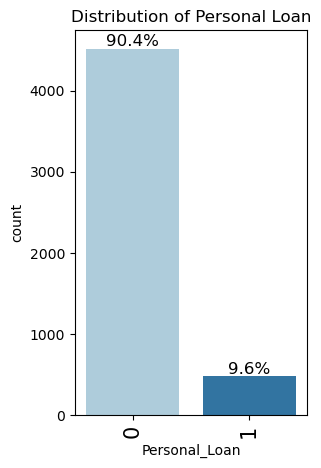

In [12]:
# Plotting a Barplot of Personal loan

labeled_barplots(data = Loan_data, feature = "Personal_Loan", perc = True, title = "Distribution of Personal Loan")


- 0 represents the customers that did not accept the personal loan offer and 1 represents the customers that accepted

- 90.4% of customers did not accept the personal loan offered in the last campaign, while 9.6% accepted

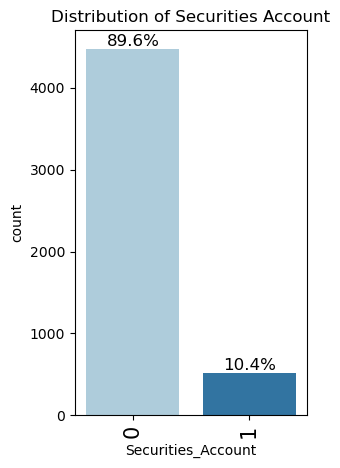

In [13]:
# Plotting a Barplot of Securities Account

labeled_barplots(data = Loan_data, feature = "Securities_Account", perc = True, title = "Distribution of Securities Account")


- 89.6% of customers do not have a securities account with the bank while 10.4% have

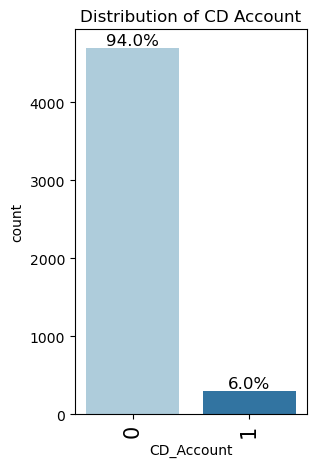

In [14]:
# Plotting a Barplot of CD Account

labeled_barplots(data = Loan_data, feature = "CD_Account", perc = True, title = "Distribution of CD Account")


- 94.0% of customers do not have a  have a certificate of deposit (CD) account with the bank while 6% have

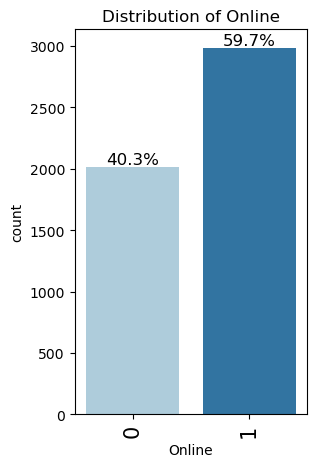

In [15]:
# Plotting a Barplot of Online

labeled_barplots(data = Loan_data, feature = "Online", perc = True, title = "Distribution of Online")


- 59.7% of customers use internet banking facilities while 40.3% do not

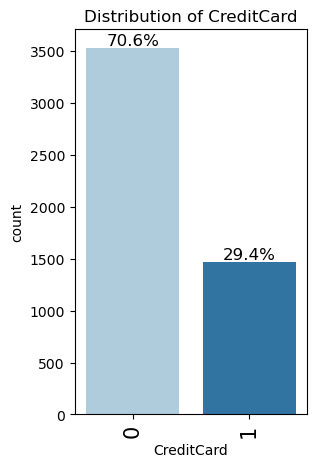

In [16]:
# Plotting a Barplot of CreditCard

labeled_barplots(data = Loan_data, feature = "CreditCard", perc = True, title = "Distribution of CreditCard")

- 70.6% of customers do not use a credit card issued by any other Bank (excluding All life Bank) while 29.4% do 

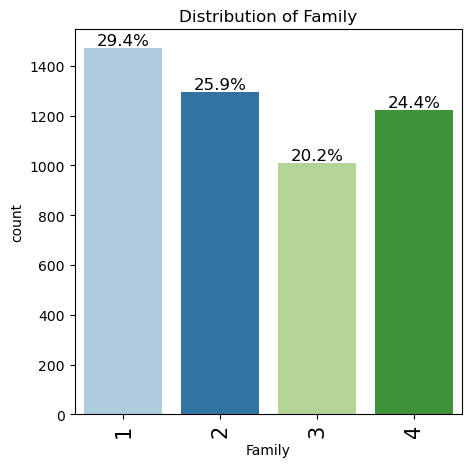

In [17]:
# Plotting a Barplot of Family

labeled_barplots(data = Loan_data, feature = "Family", perc = True, title = "Distribution of Family")

- The highest family size is 1 with 29.4% and the lowest family size is 3 with 20.2%


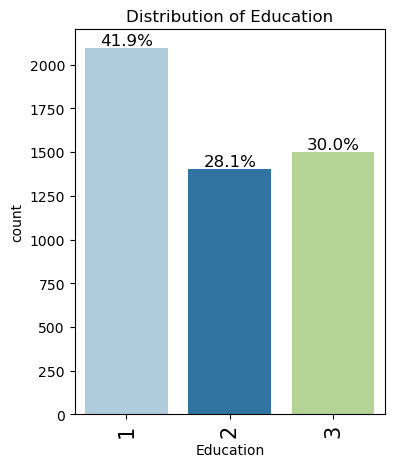

In [18]:
# Plotting a Barplot of Education

labeled_barplots(data = Loan_data, feature = "Education", perc = True, title = "Distribution of Education")

- The highest education level is 1 which the Undergrad, with 41.9% followed by 3 which is Advanced/Professional with 30.0% 
- Level 2 which is the Graduate level is the lowest with 28.1% 


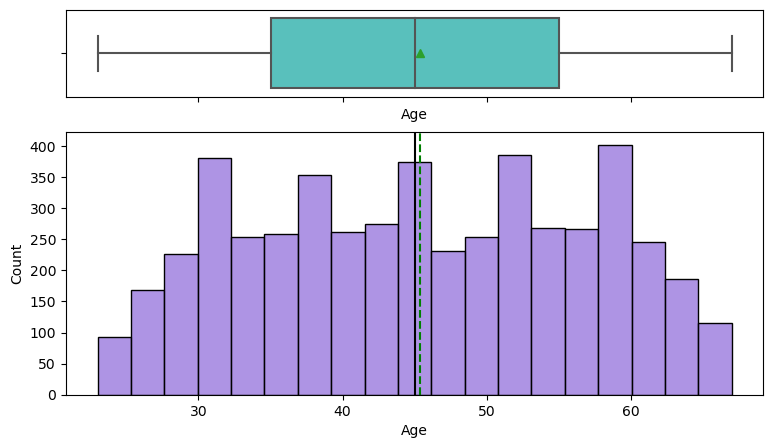

In [19]:
# plot of histogram and boxplot of Age

histogram_boxplot(data = Loan_data, feature = "Age")

- The age distribution is normally distributed with no outliers

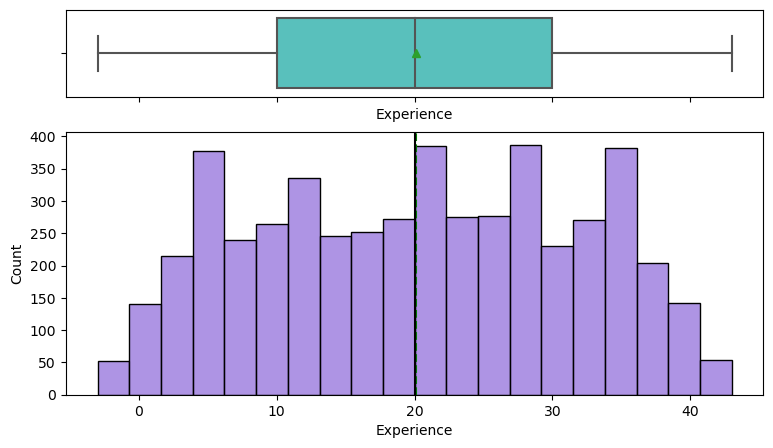

In [20]:
# plot of histogram and boxplot of Experience

histogram_boxplot(data = Loan_data, feature = "Experience")

- The experience distribution is normally distributed with no outliers

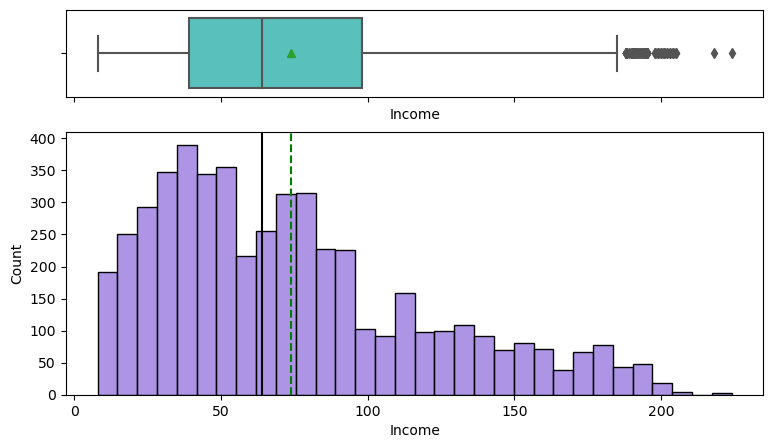

In [21]:
# plot of histogram and boxplot of Income

histogram_boxplot(data = Loan_data, feature = "Income")

- The Income distribution is righly skewed with outliers after the upper quartile

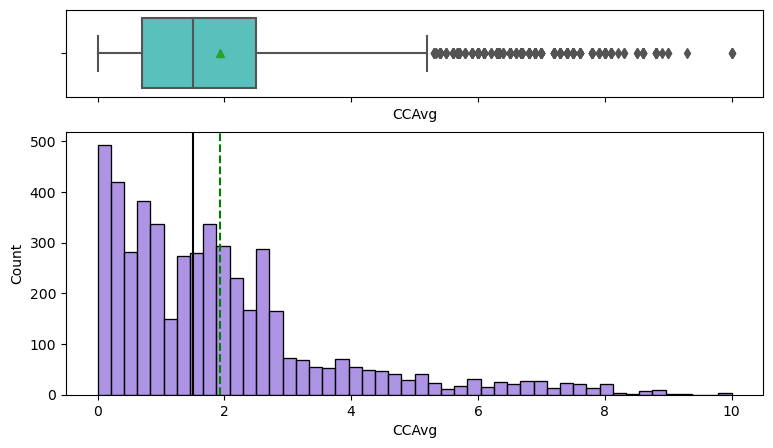

In [22]:
# plot of histogram and boxplot of CCAvg

histogram_boxplot(data = Loan_data, feature = "CCAvg")

- The CCAvg distribution is righly skewed with outliers after the upper quartile

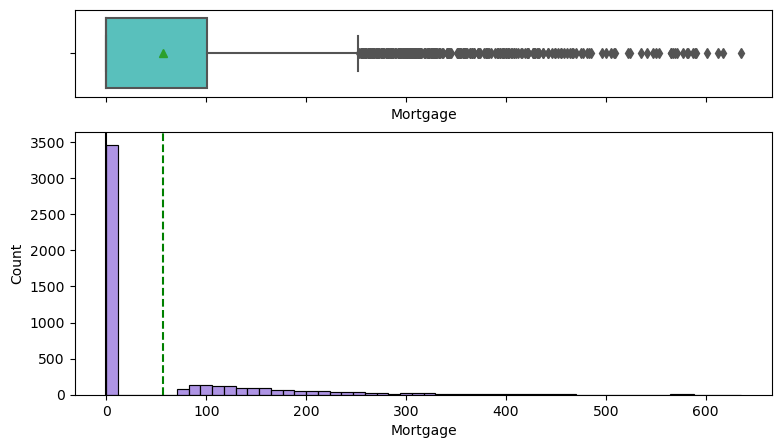

In [23]:
# plot of histogram and boxplot of Mortgage

histogram_boxplot(data = Loan_data, feature = "Mortgage")

- The Mortgage distribution is righly skewed with outliers after the upper quartile

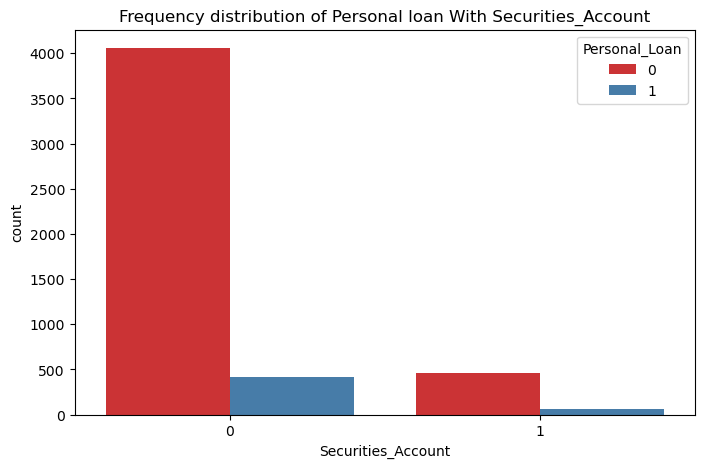

In [24]:
# frequency distribution histogram plot of personal loan with securities account

plt.subplots(figsize=(8, 5))
sns.countplot(x="Securities_Account", hue="Personal_Loan", data=Loan_data, palette="Set1")
plt.title("Frequency distribution of Personal loan With Securities_Account")
plt.show()

- From the distribution above we can see that most customers who rejected the personal loan offer in the last campaign do not have a securities account with the bank


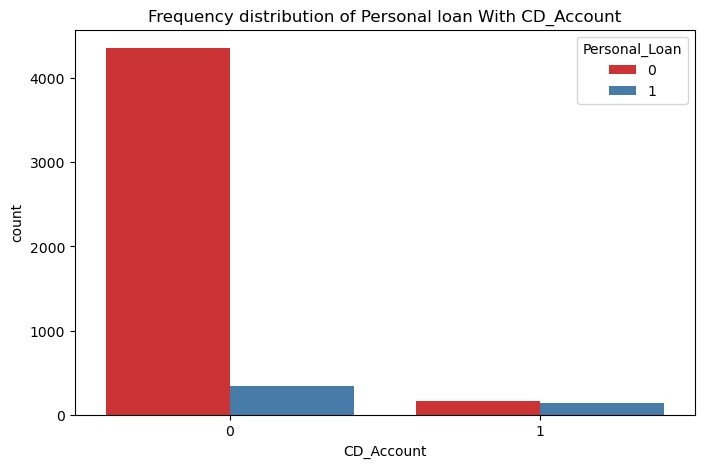

In [25]:
# frequency distribution histogram plot of personal loan with CD account

plt.subplots(figsize=(8, 5))
sns.countplot(x = "CD_Account", hue = "Personal_Loan", data = Loan_data, palette = "Set1")
plt.title("Frequency distribution of Personal loan With CD_Account")
plt.show()

- From the distribution above we can see that most customers who rejected the personal loan offer in the last campaign do not have a have a certificate of deposit (CD) account with the bank

- Less than 100 customers who accepted the personal loan offer have a certificate of deposit (CD) account with the bank

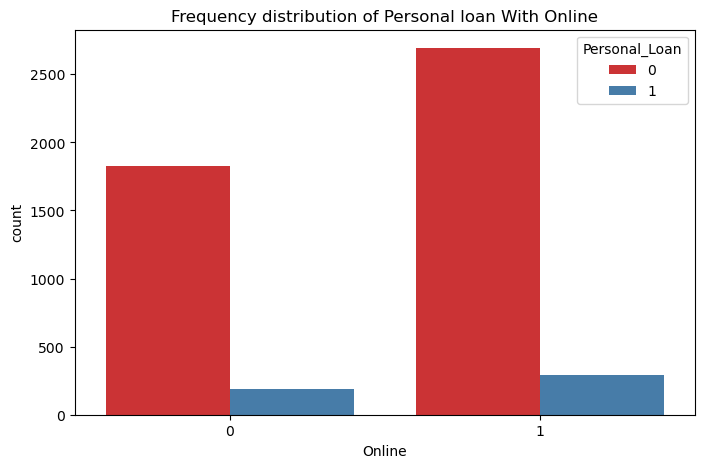

In [26]:
# frequency distribution histogram plot of personal loan with Online

plt.subplots(figsize=(8, 5))
sns.countplot(x = "Online", hue = "Personal_Loan", data = Loan_data, palette = "Set1")
plt.title("Frequency distribution of Personal loan With Online")
plt.show()

- From the distribution above we can see that over 2700 customers who rejected the personal loan offer in the last campaign use  use internet banking facilities, only about 1800 customers who rejected the personal loan offer do not use  use internet banking facilities


- Less than 500 customers who use  use internet banking facilities accepted the personal loan offer

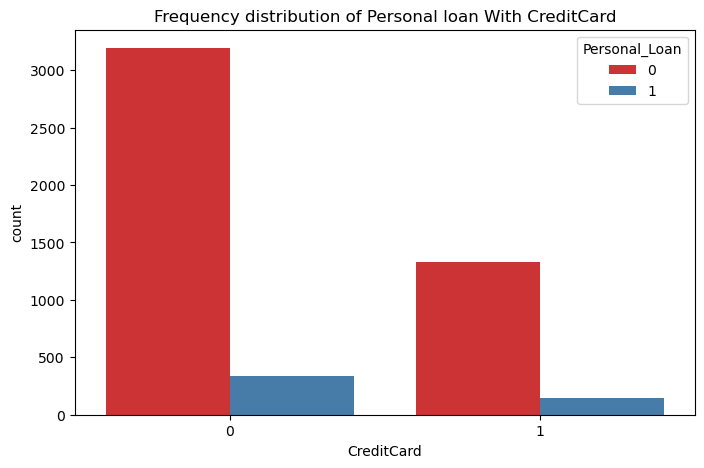

In [27]:
# frequency distribution histogram plot of personal loan with Credit Card

plt.subplots(figsize=(8, 5))
sns.countplot(x = "CreditCard", hue = "Personal_Loan", data = Loan_data, palette = "Set1")
plt.title("Frequency distribution of Personal loan With CreditCard")
plt.show()

- From the distribution above we can see that over 3300 customers who rejected the personal loan offer in the last campaign use a credit card issued by any other bank, only about 1300 customers who rejected the personal loan offer use a credit card issued by any other Bank


- About 200 customers who use a credit card issued by any other Bank accepted the personal loan offer

### BIVARIATE ANALYSIS

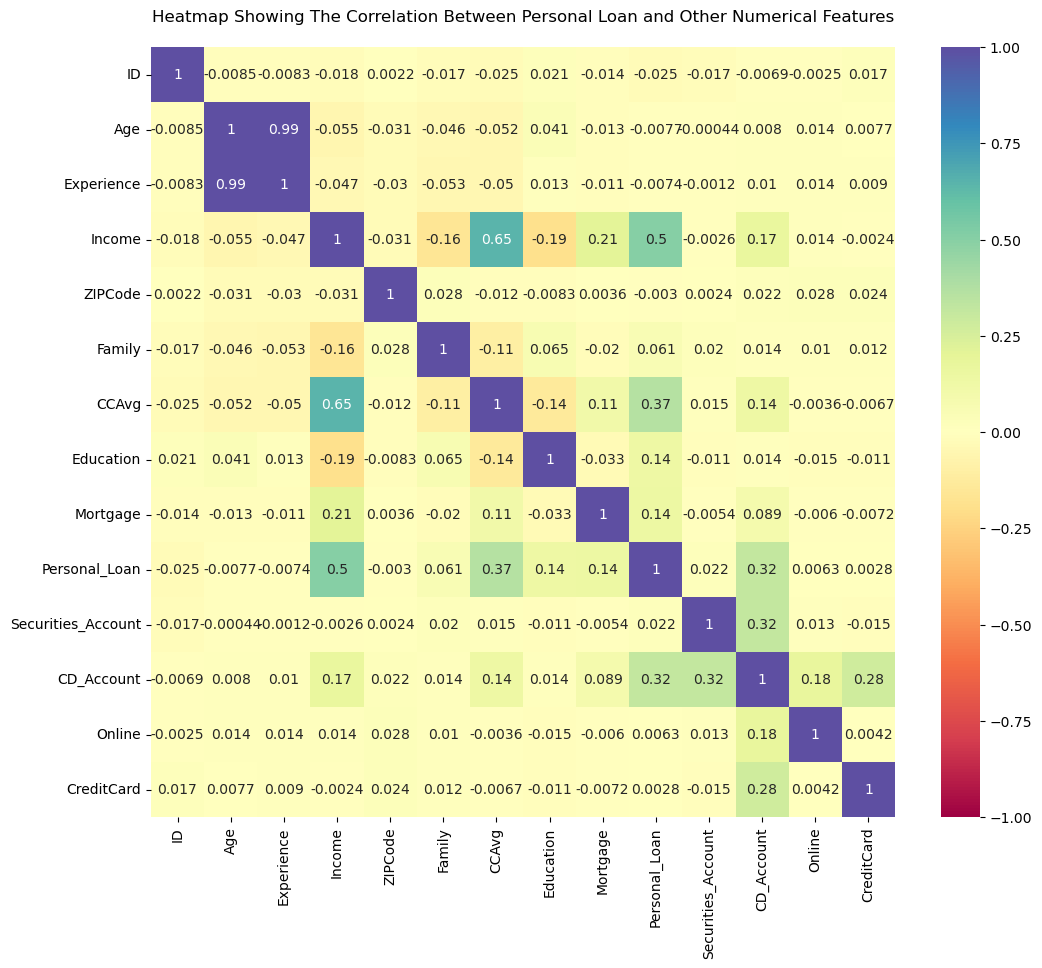

In [28]:
# plot heatmap to check for correlation between Personal Loan and Other Numerical Features

mat_cor = Loan_data.corr()

plt.figure(figsize = (12, 10))
sns.heatmap(mat_cor, annot = True, vmin = -1, vmax = 1, cmap = 'Spectral')
plt.title("Heatmap Showing The Correlation Between Personal Loan and Other Numerical Features\n")
plt.show()

- From the heatmap above we can see that there is a high positive correlation between Personal loan and Income. This suggests that the income of an individual will have a high impact on whether they are offered a personal loan or not


- Also, there is a positive correlation between Average spending on credit cards per month and certificate of deposit (CD) account


- There is a slightly positive correlation between the education level and mortgage


- There is also a high positive correlation between years of professional experience and age


- The income and Average spending on credit cards per month are highly positively correlated

### Outlier Detection and Handling

- Here we will remove all the outliers in the columns by clipping any value left to the lower whisker, to the lower whisker and any value on the right of the upper whisker to the upper whisker

In [29]:
# drop target features and unimportant features

num_data = Loan_data.drop(columns=["ID", "ZIPCode", "Personal_Loan"])

In [30]:
# Sanity Check

num_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


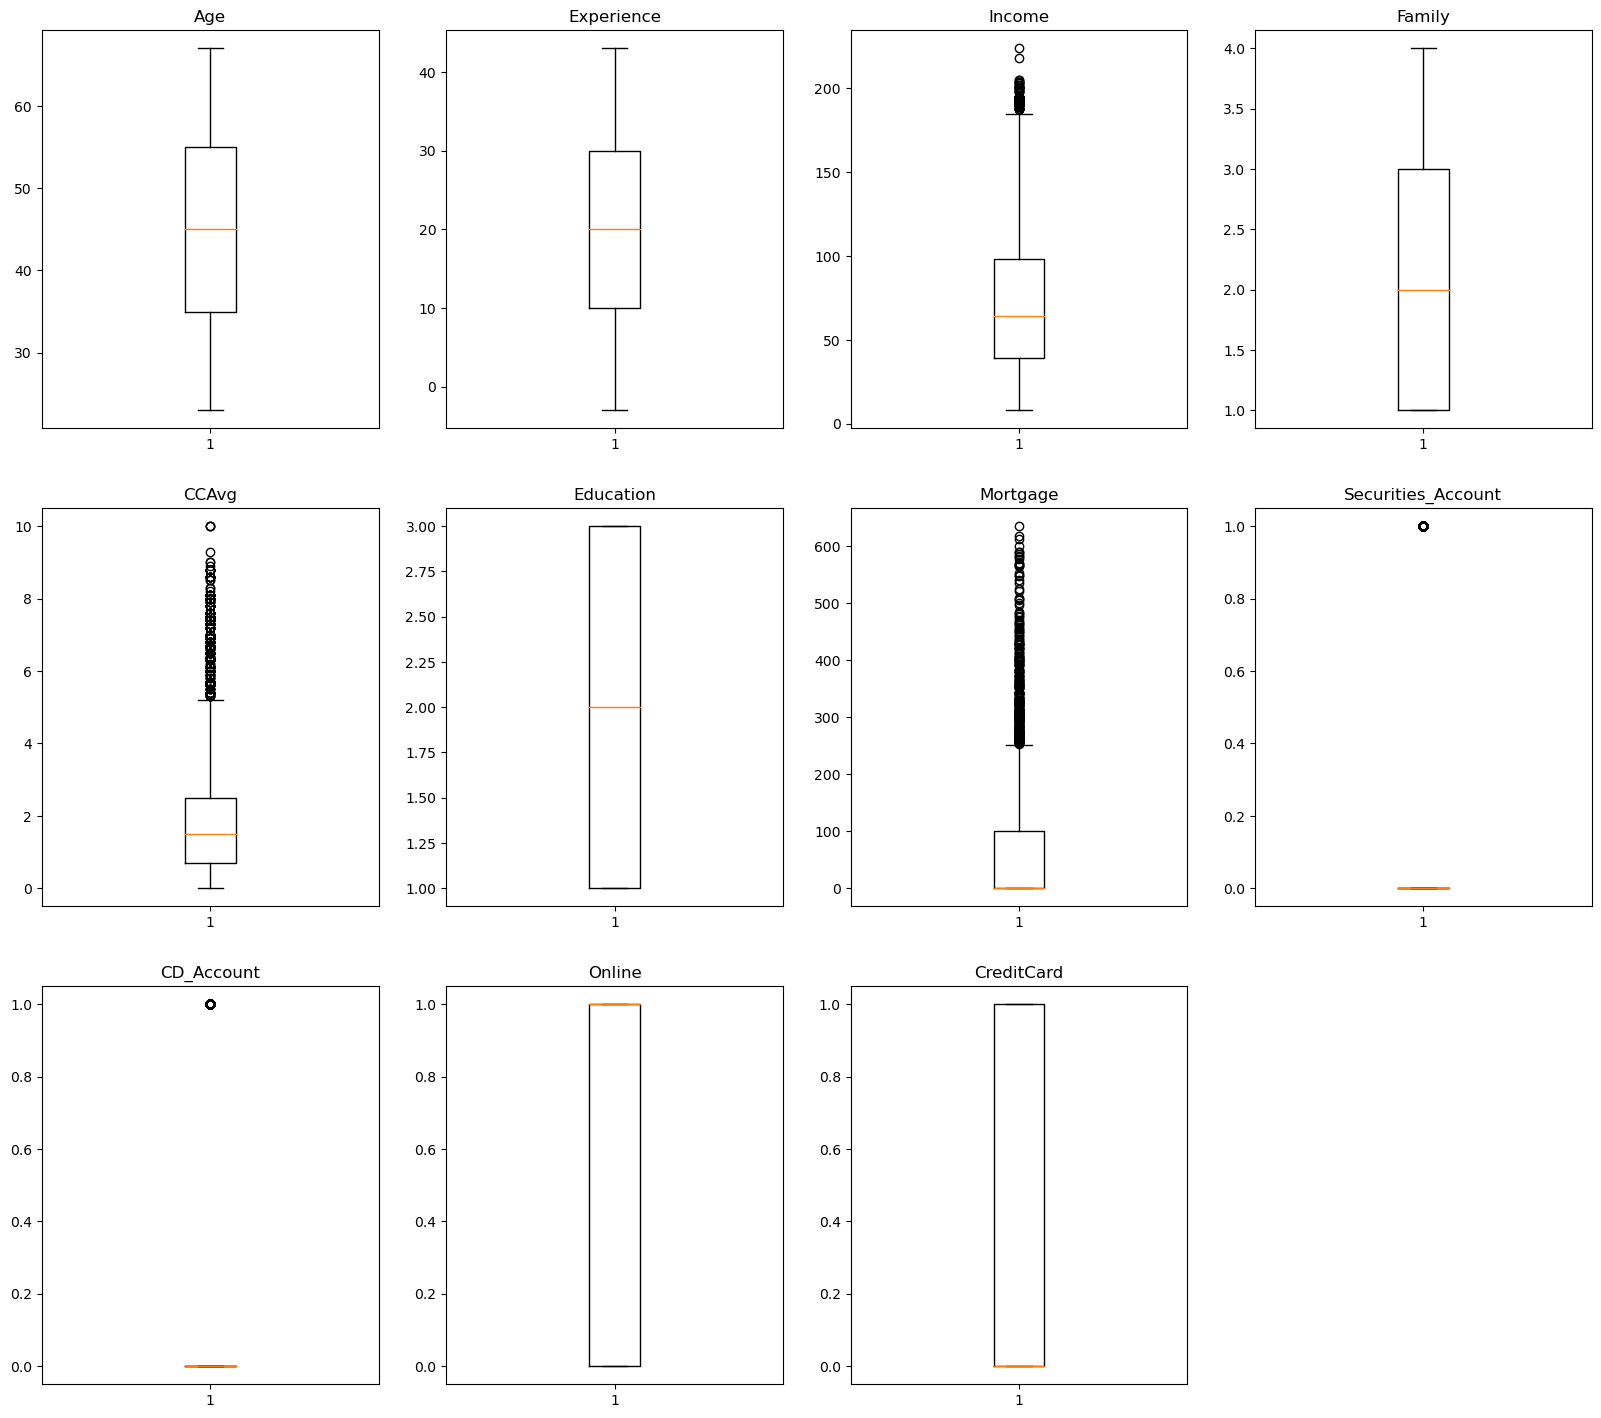

In [31]:
# outlier detection using boxplot

plt.figure(figsize = (20, 30))

for i, variable in enumerate(num_data):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(Loan_data[variable])
    plt.title(variable)
    
plt.show()

- From the boxplots above we can see outiers in Income, CCavg, Mortgage, Securies_Account and CD_Account

In [32]:
# Remove all outliers using treat_outliers

def treat_outliers(Loan_data, col):
    """
    treat outliers in variable
    col: str, name of the numerical variable
    Loan_data: dataframe
    
    """
    Q1 = Loan_data[col].quantile(0.25) # 25th quantile
    Q3 = Loan_data[col].quantile(0.75) # 75th quantile
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    Loan_data[col] = np.clip(Loan_data[col], lower_whisker, upper_whisker)
    return Loan_data

def treat_outliers_all(Loan_data, col_list):
    for c in col_list:
        Loan_data = treat_outliers(Loan_data, c)
    return Loan_data

In [33]:
Loan_data = treat_outliers_all(Loan_data, num_data)

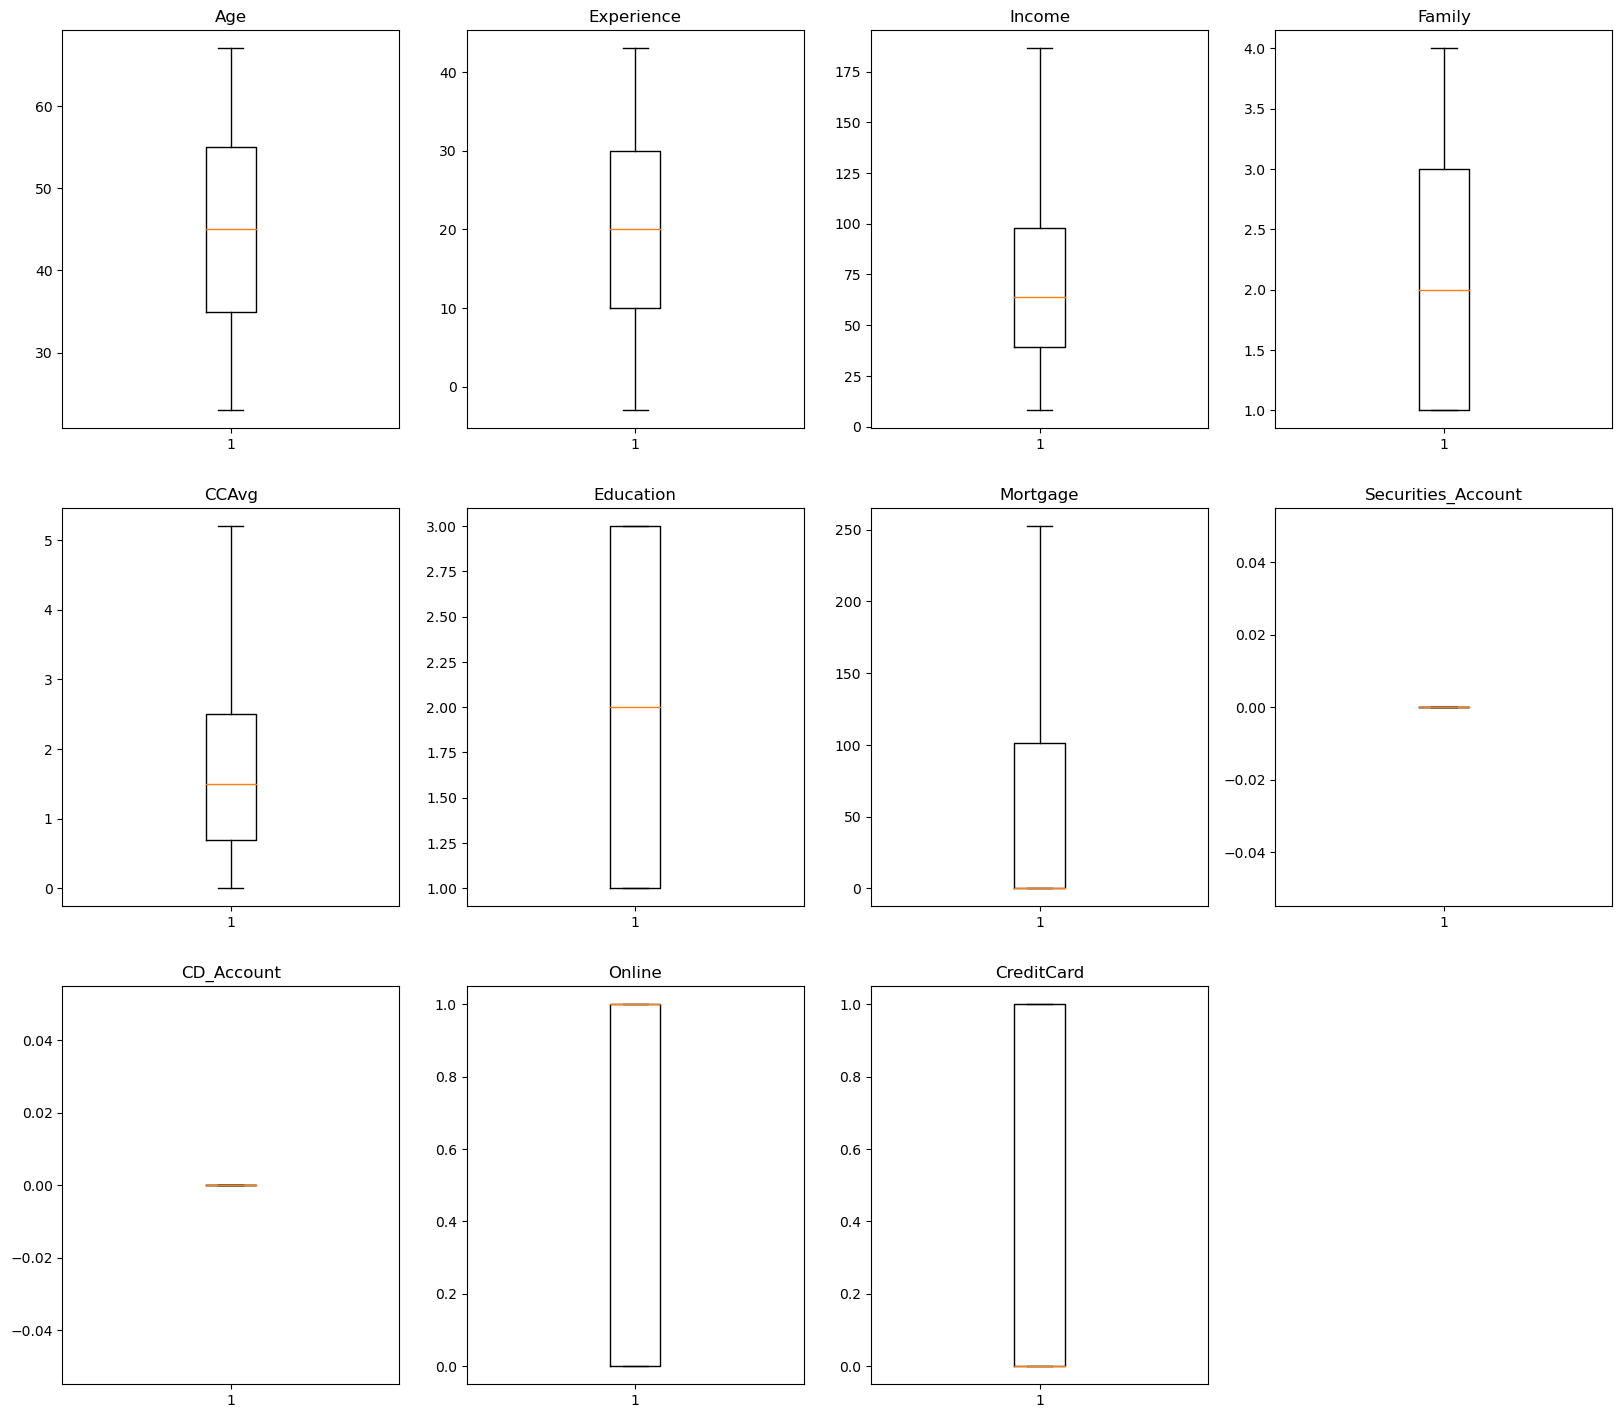

In [34]:
# Sanity Check

plt.figure(figsize = (20, 30))

for i, variable in enumerate(num_data):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(Loan_data[variable])
    plt.title(variable)
    
plt.show()

All the outliers have been treated

### Model Building

- Here we will import the required libraries and split our data set
- Build the model and check the peformance

In [35]:
# select features and target

X = num_data

y = Loan_data.Personal_Loan

- We assign the target variable to y and we dropped umimportant features and assign the rest to X

In [36]:
# sanity check

X.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [37]:
# split data into train and test set

# We will use 80% of our data for training and 20% for testing

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

- We use stratify to maintain the proportion of the classes in both the y_train and y_test

In [38]:
# check percentage of y_train data class

y_train.value_counts(normalize = True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [39]:
# check percentage of y_test data class

y_test.value_counts(normalize = True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [40]:
from sklearn.preprocessing import MinMaxScaler # import MinMaxScaler for normalization

scaler = MinMaxScaler()

x_train_sd = scaler.fit_transform(x_train) 
x_test_sd = scaler.transform(x_test)

In [41]:
# build model with a class weight

from sklearn.linear_model import LogisticRegression

log_reg_class = LogisticRegression(random_state = 0, class_weight = {1:0.9, 0:0.1})

log_reg_class.fit(x_train_sd, y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9}, random_state=0)

- We instantiate the class with the object log_reg_class 

### Model Performance Check

In [42]:
# import model performance classification to check the performance and confusion matrix

from utils1 import model_performance_classification

In [43]:
# model accuracy with a class weight 

log_reg_class.score(x_train_sd, y_train)

0.897

- With class weight we have an accuracy of 0.897 on the training data.

In [44]:
# model accuracy with class weight

log_reg_class.score(x_test_sd, y_test)

0.923

- The accuracy score for the test data is 0.923, which is higher than the accuracy for the train data. So the model with class weight is generalizing well

In [96]:
# building the model without class weight

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 0)

log_reg.fit(x_train_sd, y_train)

log_reg.score(x_train_sd, y_train)

0.952

- Without class weight, our model accuracy increased from 0.897 to 0.952

In [46]:
# checking accuracy for test data

log_reg.score(x_test_sd, y_test)

0.946

- The model accuracy for train and test data without including the class weight parameter performed better than when it was included. The model also generalizes well

### Confusion Matrix

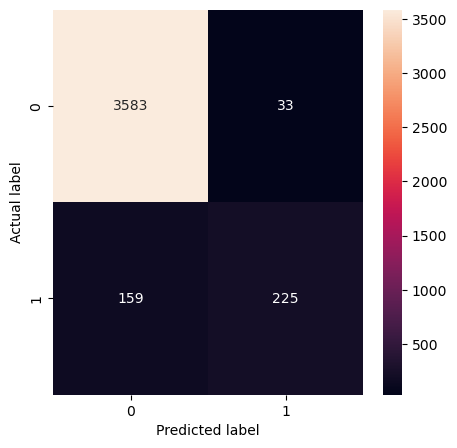

,Accuracy,Recall,Precision,F1-score
0,0.952,0.585938,0.872093,0.700935


In [47]:
# plotting confusion matrix for the scaled training data

log_reg_train = model_performance_classification(log_reg, x_train_sd, y_train)

log_reg_train


#### The confusion matrix:


- True Positives(TP): the model correctly predicted that 225 customers accepted the personal loan offer


- True Negatives(TN): The model correctly predicted that 3583 customers did not accept the personal loan offer


- False Positives(FP): the model wrongly predicted that 33 customers accepted the personal loan offer meanwhile they didn't accept


- False Negatives(FN): the model wrongly predicted that 159 customers rejected the personal loan offer meanwhile they accepted


#### The performance matrix:

- The accuracy is 95%. Which is good but not reliable


- The recall is 58% which is low


- The precision is 87% which is good


- The f1 score is 70% which is low


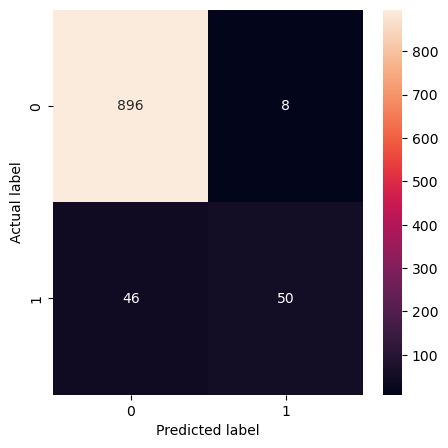

,Accuracy,Recall,Precision,F1-score
0,0.946,0.520833,0.862069,0.649351


In [48]:
# plotting confusion matrix for the scaled test data

log_reg_test = model_performance_classification(log_reg, x_test_sd, y_test)

log_reg_test


#### The confusion matrix:


- True Positives(TP): the model correctly predicted that 50 customers accepted the personal loan offer


- True Negatives(TN): The model correctly predicted that 896 customers did not accept the personal loan offer


- False Positives(FP): the model wrongly predicted that 8 customers accepted the personal loan offer meanwhile the didn't accept


- False Negatives(FN): the model wrongly predicted that 46 customers rejected the personal loan offer meanwhile they accepted


#### The performance:

- The recall and precision performed slighted better in the train data but the accuracy is similar. This means that the model is generalizing well

### Model Improvement

1)  Since the bank is focused on increasing the borrowers customer base, that is, customers who have a higher potential of purchasing a loan, we are going to focus on improving the **precision metric**. This means we will be reducing the number of people who are wrongly predicted to have accepted the loan. To obtain this, we would be increasing the threshold

2)  We would also balance the data using the SMOTE technique to obtain a better performing model

### 1) Improving the Precision Metric by increasing the threshold

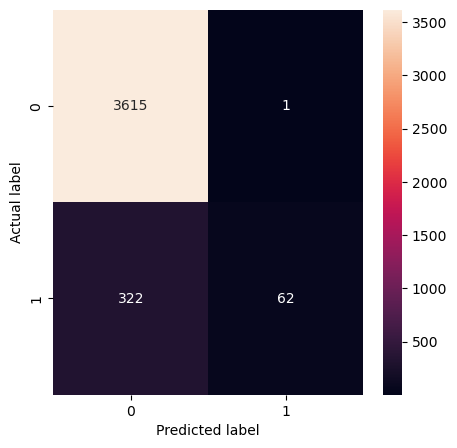

,Accuracy,Recall,Precision,F1-score
0,0.91925,0.161458,0.984127,0.277405


In [49]:
# increasing the threshold from 0.5 to 0.95

log_reg2_train = model_performance_classification(log_reg, x_train_sd, y_train, threshold = 0.95)

log_reg2_train

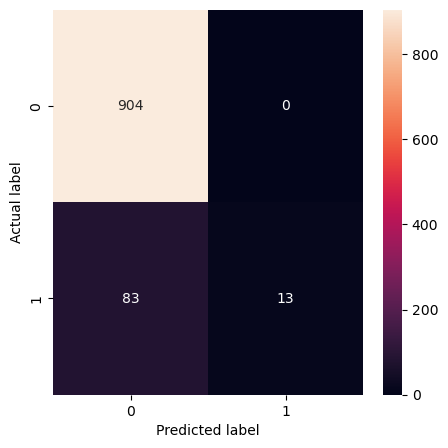

,Accuracy,Recall,Precision,F1-score
0,0.917,0.135417,1.0,0.238532


In [50]:
log_reg2_test = model_performance_classification(log_reg, x_test_sd, y_test, threshold = 0.95)

log_reg2_test

- After increasing the threshold for our model, we got 98% precision on training data and 100% precision on test data. Since the precision for the training and test data are not so far apart, our model is generalizing well.


- Our model greatly improved from a precision of 86% with a threshold of 0.5 to 100% on test data with threshold of 0.95%

### 2) Balancing Data Using SMOTE

In [51]:
# Balancing the data

from imblearn.over_sampling import SMOTE 

In [52]:
# using smote to balance the data

smote = SMOTE(random_state = 0)

X_sm, y_sm = smote.fit_resample(X, y)

In [97]:
print(X_sm.shape, y_sm.shape)

(9040, 11) (9040,)


In [99]:
# checking for balance

y_sm.value_counts(normalize = True) 

0    0.5
1    0.5
Name: Personal_Loan, dtype: float64

Our data is balanced


In [54]:
# split the SMOTE data

x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = 0.2)

In [55]:
# scaling the data

x_train_sm_sd = scaler.fit_transform(x_train_sm)
x_test_sm_sd = scaler.transform(x_test_sm)

In [56]:
# building our logistic regression model on SMOTE data

log_reg3 = LogisticRegression(random_state = 0)

log_reg3.fit(x_train_sm_sd, y_train_sm)

LogisticRegression(random_state=0)

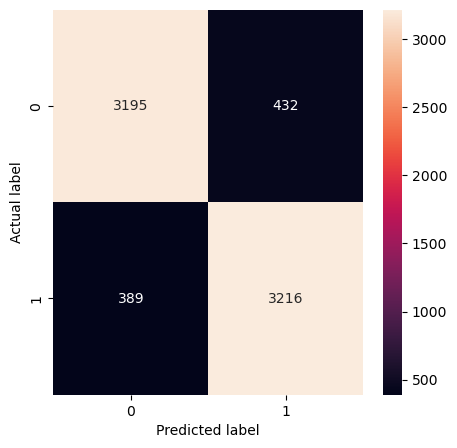

,Accuracy,Recall,Precision,F1-score
0,0.886477,0.892094,0.881579,0.886805


In [57]:
# logistic regression for the train data

log_reg3_train =  model_performance_classification(log_reg3, x_train_sm_sd, y_train_sm)

log_reg3_train

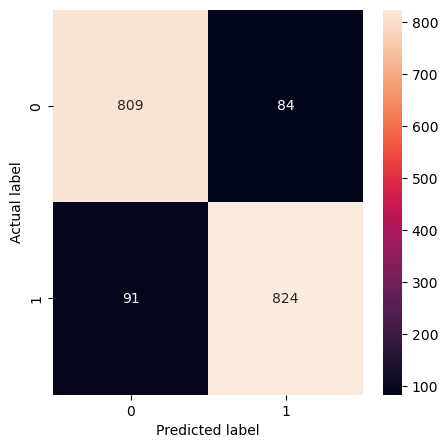

,Accuracy,Recall,Precision,F1-score
0,0.903208,0.900546,0.907489,0.904004


In [58]:
# logistic regression for the test data

log_reg3_test =  model_performance_classification(log_reg3, x_test_sm_sd, y_test_sm)

log_reg3_test

- Our model generalizes well. The Precision in the test is 0.907 and that of the train is 0.881. The recall on the train is 0.892 and that of the test is 0.900, which is very close. 


- The values for the precision and recall are better than what we got before balancing the data


- The recall and precision for both train and test are close


- Also our accuracy on the train is 0.886 and that of the test is 0.903, still very close.



In [59]:
# weights

log_reg3.coef_

array([[-0.18840839,  0.2943104 ,  9.52387783,  1.00425549,  2.83177074,
         1.5776244 ,  0.20051919, -2.13550015,  3.25712194, -1.22215026,
        -1.94978771]])

In [60]:
list(X.columns)

['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard']

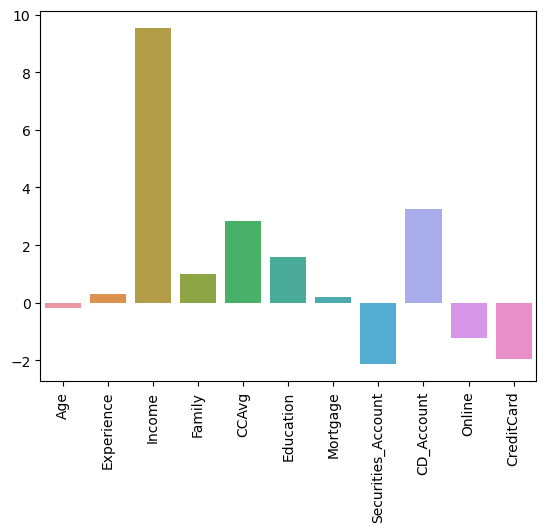

In [61]:
# barplot of logistic regression coefficients using the best model

sns.barplot(x = list(X.columns), y = log_reg3.coef_[0])
plt.xticks(rotation = 90)
plt.show()

Based on our logistic regression model and the corresponding plot, the top 5 factors that significantly influence a customer's ability to purchase a loan are as follows:

1. **Income** : Our analysis reveals that income plays a pivotal role in customers' decision-making when it comes to purchasing a loan. Customers with higher income levels demonstrate greater financial stability and a higher capacity to repay loans.


2. **CCAvg** : Another significant factor influencing the probability of loan purchases is the average credit card spending (CCAvg) of customers. Our findings suggest that individuals who spend more on their credit cards tend to have a higher inclination to seek additional funds through a loan.


3. **CD_Account** : Our analysis also uncovers an interesting relationship between customers who hold a certificate of deposit account (CD_Account) and their propensity to purchase a loan. It appears that customers who have established a banking relationship by holding a CD account are more inclined to explore additional financial products from the same bank, including loans. 


4. **Education** : The impact of education on loan purchasing decisions is another vital finding from our analysis. Customers with higher levels of education demonstrate a higher probability of purchasing a loan


5. **Family** : Our analysis also indicates that the family composition of customers plays a role in their likelihood of purchasing a loan. Customers with larger families may have increased financial responsibilities, such as education expenses, medical bills, or home improvements, which can drive their need for additional funds. 

### Decision Tree Model

In [62]:
# build the decision tree model

dec_tree = DecisionTreeClassifier(random_state = 0)

dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

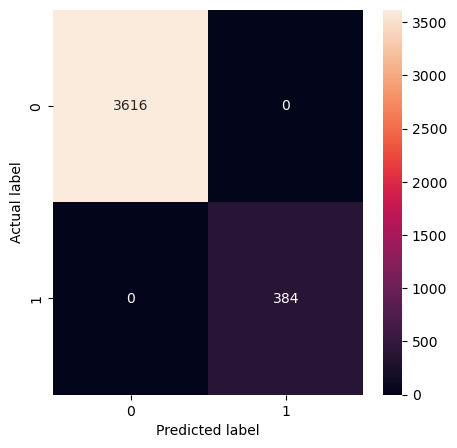

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [63]:
# check confusion matrix and model performance for train set

dec_Loan_data_train = model_performance_classification(dec_tree, x_train, y_train)

dec_Loan_data_train

In [64]:
# build decision tree for test set

dec_tree_test = DecisionTreeClassifier(random_state = 0)

dec_tree_test.fit(x_test, y_test)

DecisionTreeClassifier(random_state=0)

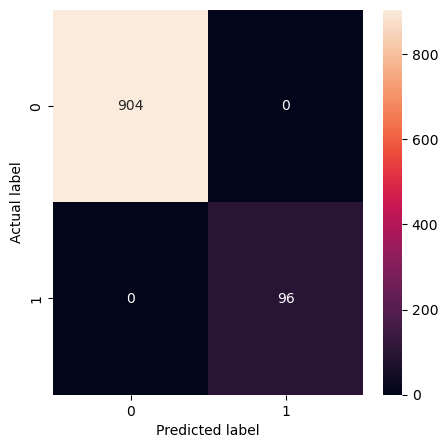

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [65]:
# check confusion matrix and decision tree model performance for test data

dec_Loan_data_test = model_performance_classification(dec_tree_test, x_test, y_test)

dec_Loan_data_test

The unbalanced data for our decision tree model gives us 100% scores for accuracy, recall, precision and f1 scores
for both the training and test data

### Balance data using SMOTE

In [66]:
# use SMOTE to balance data

smote = SMOTE(random_state = 0)

X_sm, y_sm = smote.fit_resample(X, y)

In [67]:
# check smote y data set class percentage

y_sm.value_counts()

0    4520
1    4520
Name: Personal_Loan, dtype: int64

In [68]:
# spilt data for smote data

x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size = 0.2, random_state=0)

In [69]:
# build model using balanced data

dec2_tree = DecisionTreeClassifier(random_state =0)
dec2_tree.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(random_state=0)

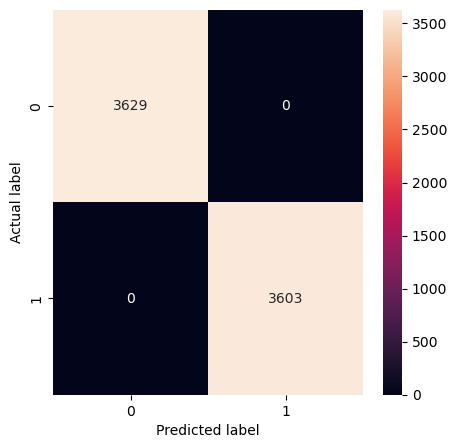

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [70]:
# check confusion matrix and model performance on train set on balanced data

dec2_trainLoan_data = model_performance_classification(dec2_tree, x_train_sm, y_train_sm)

dec2_trainLoan_data

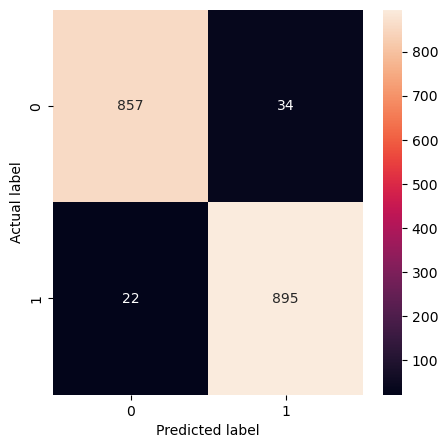

,Accuracy,Recall,Precision,F1-score
0,0.969027,0.976009,0.963402,0.969664


In [71]:
# check confusion matrix and model performance on test set on balanced data

dec2_testLoan_data = model_performance_classification(dec2_tree, x_test_sm, y_test_sm)

dec2_testLoan_data

 After balancing our data using SMOTE, our model is overfitting. The accuracy, recall and precision on the train set is above that of the test

### Tuning the Max Depth Parameter

In [72]:
# adjust max_depth to improve result on balanced data

dec3_tree = DecisionTreeClassifier(random_state =0, max_depth = 4)
dec3_tree.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=4, random_state=0)

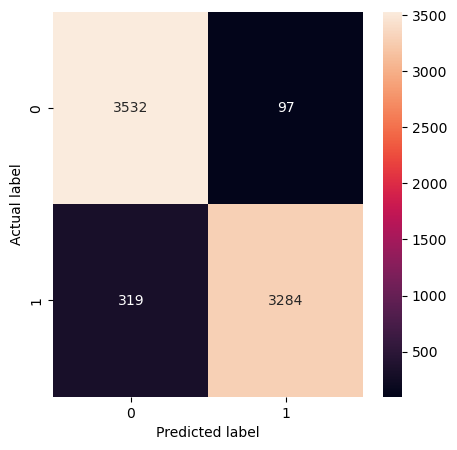

,Accuracy,Recall,Precision,F1-score
0,0.942478,0.911463,0.97131,0.940435


In [73]:
# check confusion matrix and model performance on train set 

dec3_trainLoan_data = model_performance_classification(dec3_tree, x_train_sm, y_train_sm)

dec3_trainLoan_data

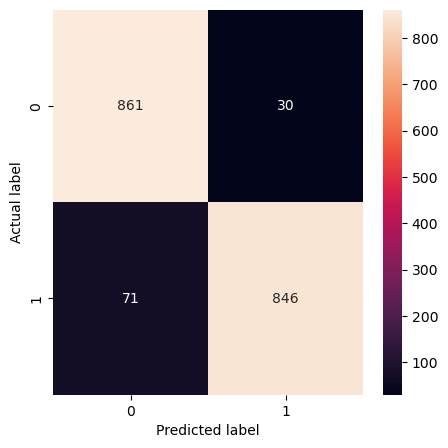

,Accuracy,Recall,Precision,F1-score
0,0.944137,0.922574,0.965753,0.94367


In [74]:
# check confusion matrix and model performance on test set 

dec3_testLoan_data = model_performance_classification(dec3_tree, x_test_sm, y_test_sm)

dec3_testLoan_data

After tuning the max depth parameter to 4, we now have a decision tree model that generalizing well. The presicion on the training data is 97% while that of the test data is 96%, which is very close. 

Similarly, the recall on the test data is 92% while that on the training data is 91%. The accuracy on the training data is 94% while that on the test data is 94%. This just goes ahead to prove that our model is generalizing well

In [75]:
# import required libraries to plot decision tree graph

import pydotplus
from IPython.display import Image

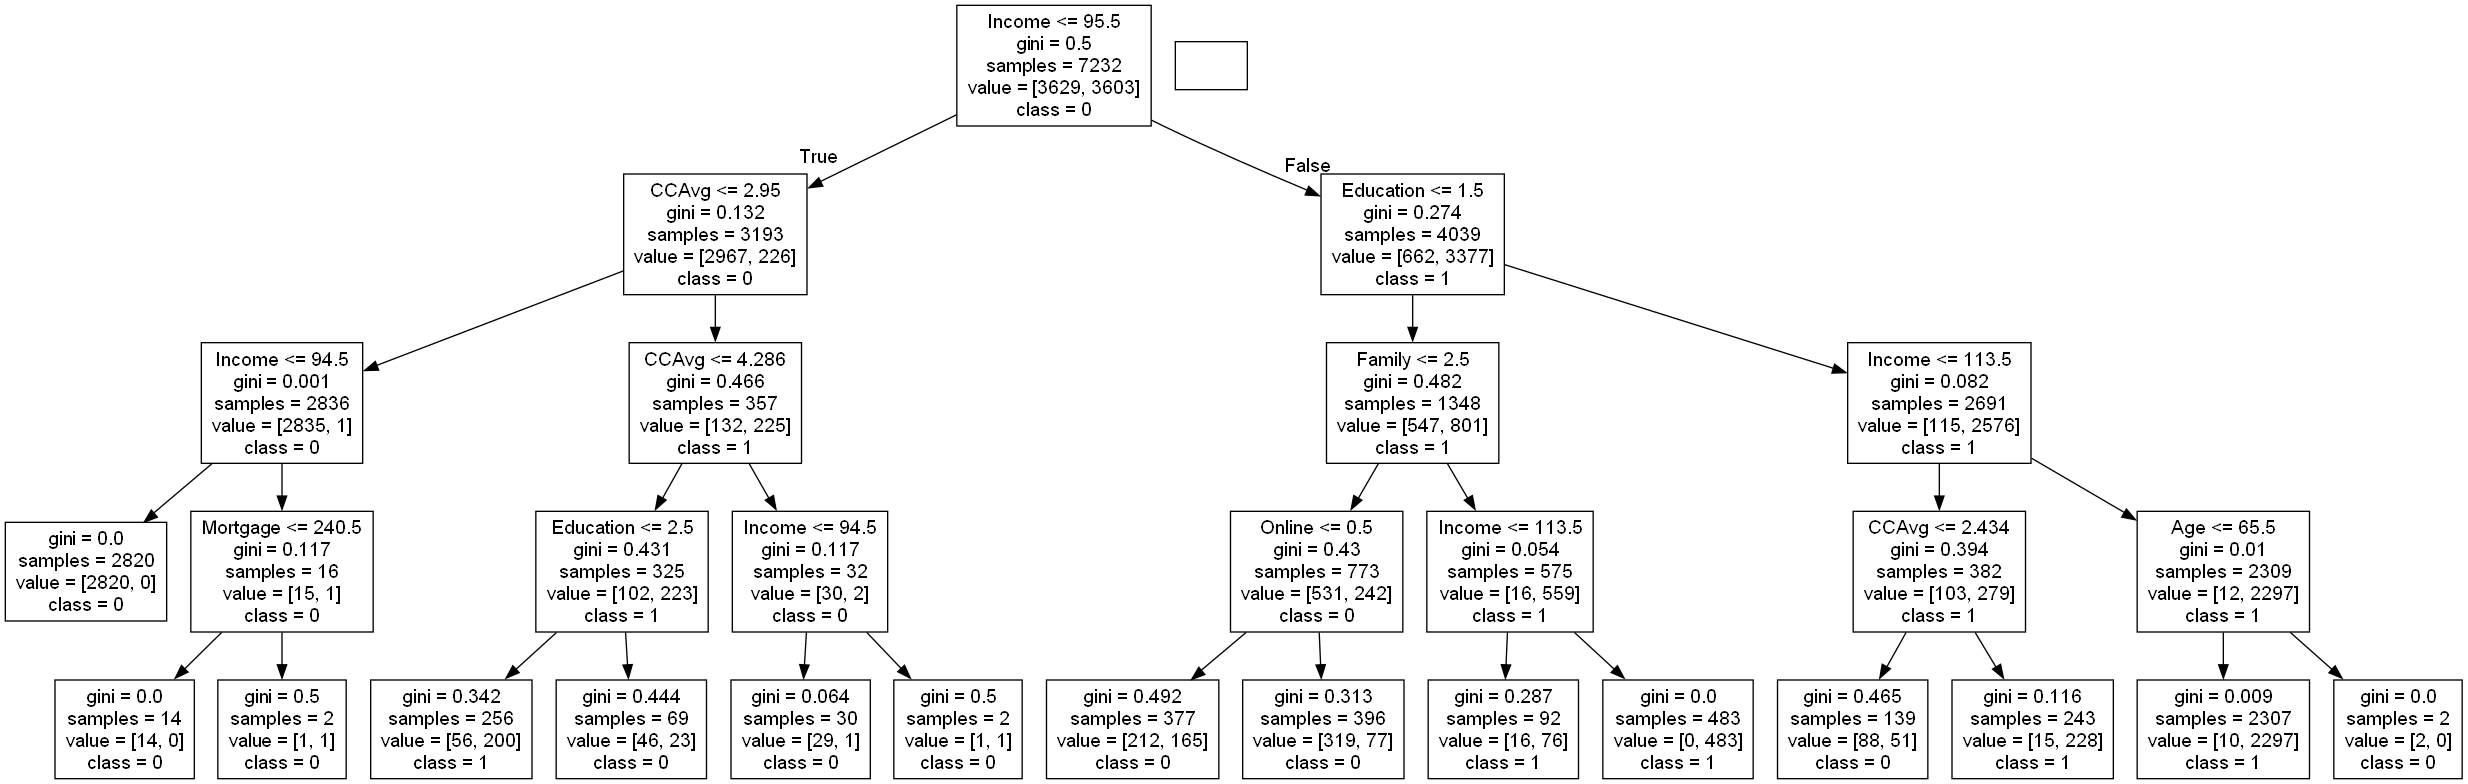

In [76]:
# plot decision tree

dot_data = tree.export_graphviz(dec3_tree, out_file=None, feature_names=X.columns,
                               class_names=["0", "1"])

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())


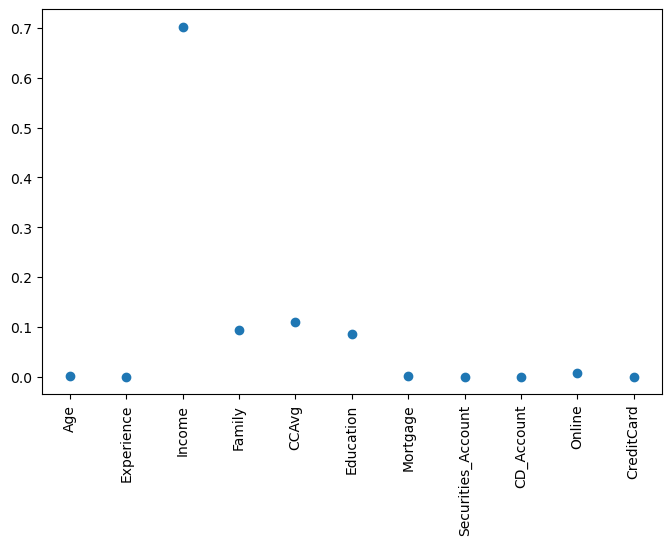

In [77]:
# Plotting a graph of feature importance to show the impact

plt.figure(figsize = (8, 5))
plt.plot(dec3_tree.feature_importances_, "o")
plt.xticks(range(X.shape[1]), X.columns, rotation = 90)
plt.show()

Based on our decision tree model and the corresponding plot, the top 5 factors that significantly influence a customer's ability to purchase a loan are as follows:

1. **Income** : Our analysis reveals that income plays a pivotal role in customers' decision-making when it comes to purchasing a loan. Customers with higher income levels demonstrate greater financial stability and a higher capacity to repay loans.


2. **CCAvg** : Another significant factor influencing the probability of loan purchases is the average credit card spending (CCAvg) of customers. Our findings suggest that individuals who spend more on their credit cards tend to have a higher inclination to seek additional funds through a loan.


3. **Online** : The coefficient of Online in the decision tree model reveals that customers' online engagement is another significant factor impacting their loan purchasing behavior. Customers who frequently engage with online banking services or show a preference for online transactions may have a higher inclination to explore loan products offered through digital channels


4. **Education** : The impact of education on loan purchasing decisions is another vital finding from our analysis. Customers with higher levels of education demonstrate a higher probability of purchasing a loan


5. **Family** : Our analysis also indicates that the family composition of customers plays a role in their likelihood of purchasing a loan. Customers with larger families may have increased financial responsibilities, such as education expenses, medical bills, or home improvements, which can drive their need for additional funds. 

### Random Forests Model

In [78]:
# import the random forests model

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# instantiate the classifier

rf = RandomForestClassifier(random_state = 0)

# train the model with balanced x and y data

rf.fit(x_train_sm, y_train_sm)

RandomForestClassifier(random_state=0)

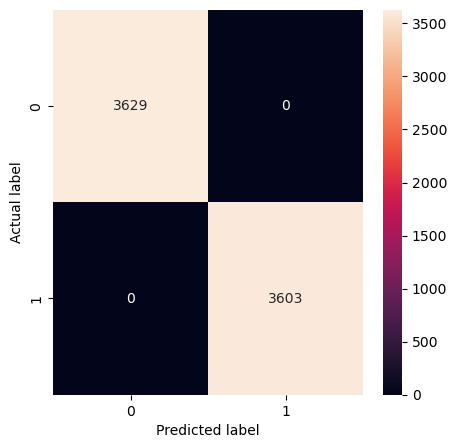

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [79]:
# Evaluate model performance on training set

rf_train = model_performance_classification(rf, x_train_sm, y_train_sm)
rf_train

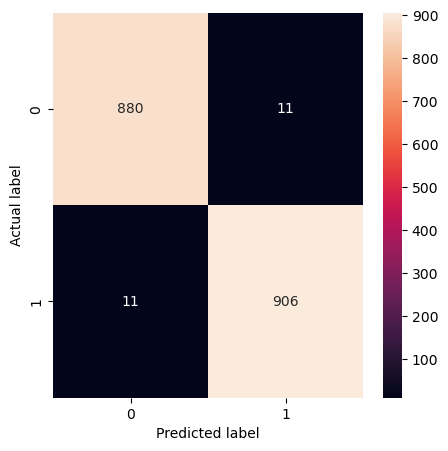

,Accuracy,Recall,Precision,F1-score
0,0.987832,0.988004,0.988004,0.988004


In [80]:
# Evaluate model performance on test data

rf_test = model_performance_classification(rf, x_test_sm, y_test_sm)
rf_test

Using the random forests model without tuning the hyperparameter gives us a model that overfits. The accuracy, precision, recall and f1 scores for the training data is higher than that of the test data


### TUNING HYPERPARAMETER FOR THE RANDOM FORESTS MODEL

- We will tune the max_depth hyperparameter of the random forests model to 4 to improve it's performance

In [81]:
# instantiate the classifier and include max_depth of 4 assign new variable rf2

rf2 = RandomForestClassifier(random_state = 0, max_depth = 4)

# train the model with balanced x and y data

rf2.fit(x_train_sm, y_train_sm)

RandomForestClassifier(max_depth=4, random_state=0)

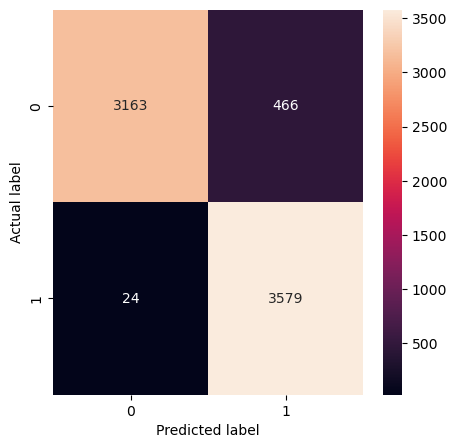

,Accuracy,Recall,Precision,F1-score
0,0.932246,0.993339,0.884796,0.935931


In [82]:
# Evaluate model performance on training data

rf2_train = model_performance_classification(rf2, x_train_sm, y_train_sm)
rf2_train

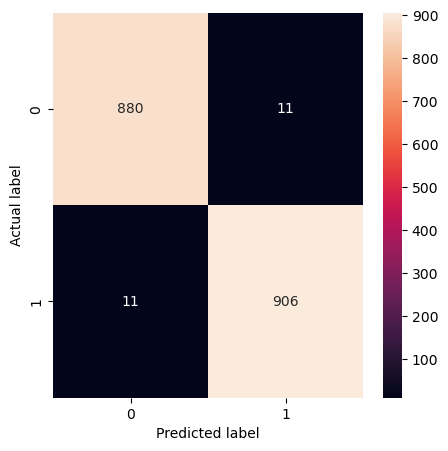

,Accuracy,Recall,Precision,F1-score
0,0.987832,0.988004,0.988004,0.988004


In [83]:
# Evaluate model performance on test data

rf2_test = model_performance_classification(rf, x_test_sm, y_test_sm)
rf2_test

Tuning the hyperparameter to maximum depth of 4 gives us a better performing model that is generalizing well. Here the accuracy of test data is approximately 99% while that of the training is approximately 93%. It performed better in the test data

The precision for test data is approximately 99% while that of the training data is 88%. It performed better in the test data

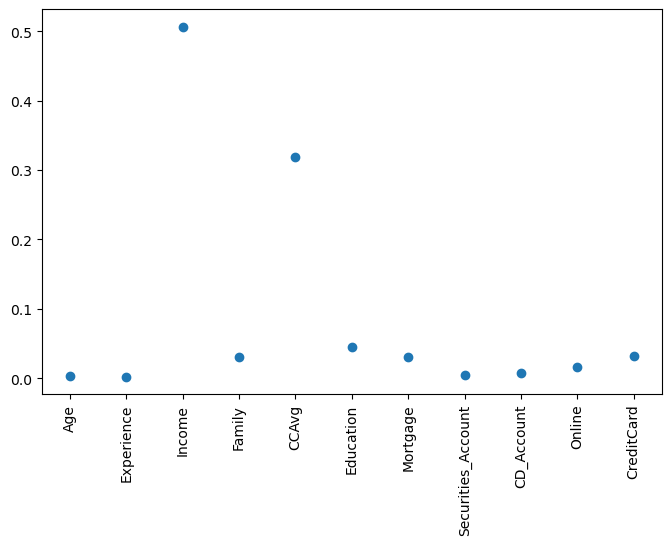

In [84]:
# Plotting a graph of feature importance to show the impact

plt.figure(figsize = (8, 5))
plt.plot(rf2.feature_importances_, "o")
plt.xticks(range(X.shape[1]), X.columns, rotation = 90)
plt.show()

Based on our random forests model and the corresponding plot, the variables that significantly influence a customer's ability to purchase a loan are: Income, CCAvg, Education, Family, Mortgage and CreditCard.

In this model, the CCAvg has a higher impact than the logistic regression model and the decision tree model


### Gradient Boosting Classifier

In [85]:
# import the gradient boosting classifier and instantiate using the variable gb

gb = GradientBoostingClassifier(random_state = 0)

# train the model with the balanced data

gb.fit(x_train_sm, y_train_sm)

GradientBoostingClassifier(random_state=0)

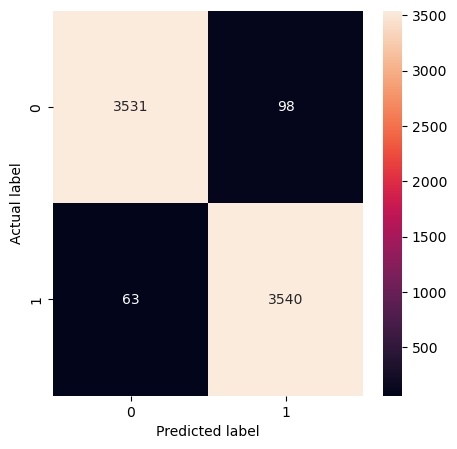

,Accuracy,Recall,Precision,F1-score
0,0.977738,0.982515,0.973062,0.977766


In [86]:
# Check model performance on training set

gb_train = model_performance_classification(gb, x_train_sm, y_train_sm)
gb_train

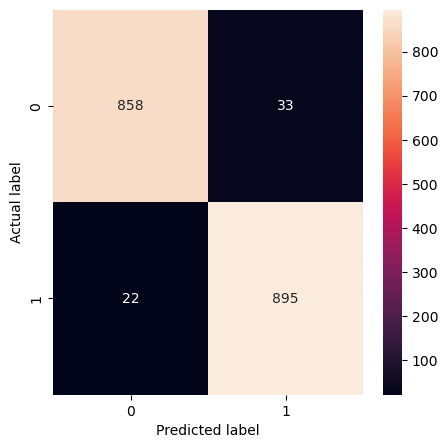

,Accuracy,Recall,Precision,F1-score
0,0.96958,0.976009,0.96444,0.97019


In [87]:
# Evaluate model performance on test data

gb_test = model_performance_classification(gb, x_test_sm, y_test_sm)
gb_test

Thw peformance metrics for the training and test data. This means that our model generalizes well

### Improving Gradient Boosting model performance with Grid Search

In [88]:
# import the grid search mode and the estimator

from sklearn.model_selection import GridSearchCV

# set the parameters to tune
param_grid = {"learning_rate": [0.001, 0.01, 0.1, 1, 10],
               "max_depth" : list(range(1, 5)),
               "criterion" : ["friedman_mse", "mse"]}

# instantiate the models

gb = GradientBoostingClassifier(random_state = 0)
grid = GridSearchCV(gb, param_grid, cv = 5, n_jobs = -1, scoring = "precision")

# fit the grid search model on the training set

grid.fit(x_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [1, 2, 3, 4]},
             scoring='precision')

In [89]:
# get the best parameters

best_params = grid.best_params_

best_params

{'criterion': 'friedman_mse', 'learning_rate': 1, 'max_depth': 4}

The best parameters to get a very good precision score 

In [90]:
# get the scorer

grid.scorer_

make_scorer(precision_score, average=binary)

In [91]:
# get the best score

grid.best_score_

0.9834248588263819

The best precision score from tuning the hyperparameter is 98%

### Re-build thre Gradient Boosting model with the best parameters


In [92]:
# re-build the model using the best parameters gotten from our grid search

gb2 = GradientBoostingClassifier(**best_params, random_state = 0)

gb2.fit(x_train_sm, y_train_sm)

GradientBoostingClassifier(learning_rate=1, max_depth=4, random_state=0)

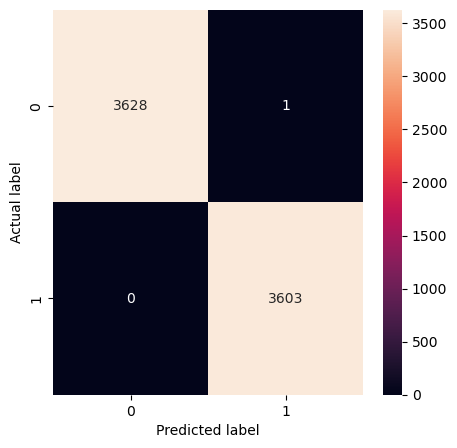

,Accuracy,Recall,Precision,F1-score
0,0.999862,1.0,0.999723,0.999861


In [93]:
# Evaluate model performance using the tuning parameter model on training data

gb_train = model_performance_classification(gb2, x_train_sm, y_train_sm)

gb_train  

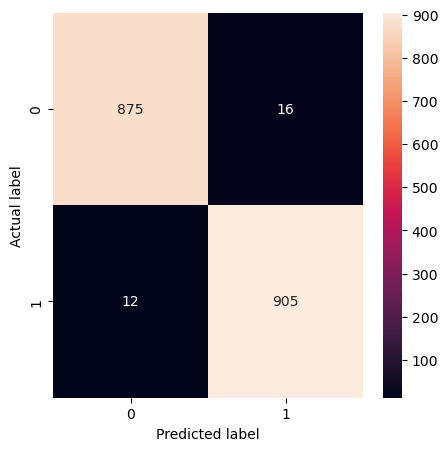

,Accuracy,Recall,Precision,F1-score
0,0.984513,0.986914,0.982628,0.984766


In [94]:
# Evaluate model performance using the tuning parameter model on test data

gb_test = model_performance_classification(gb2, x_test_sm, y_test_sm)

gb_test

Our model not only generalizes well, it also has a higher precision score for the training and test data after the gridsearch was implemented

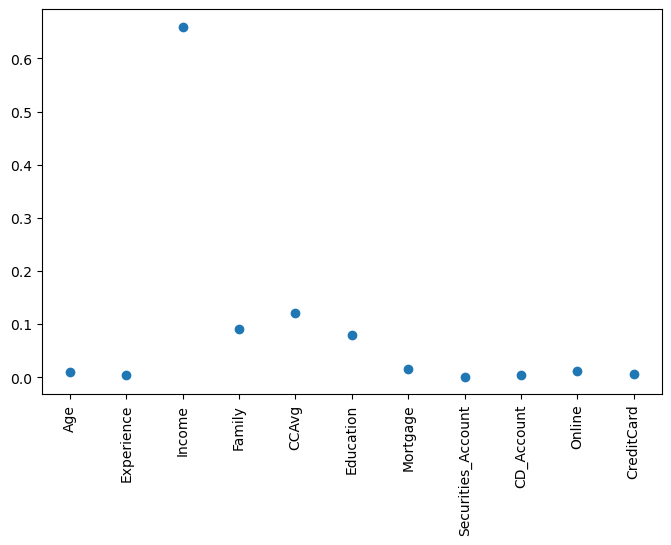

In [95]:
# Plotting a graph of feature importance derived from the model to show the impact

plt.figure(figsize = (8, 5))
plt.plot(gb2.feature_importances_, "o")
plt.xticks(range(X.shape[1]), X.columns, rotation = 90)
plt.show()

Based on our gradient boosting model and the corresponding plot, the variables that significantly influence a customer's ability to purchase a loan are: Income, CCAvg, Education and Family

In this model, the Education has the highest impact on the model while the Family variable has a higher impact than the logistic regression model, the decision tree model and random forests model

### LOGISTIC REGRESSION MODEL VS DECISION TREE MODEL


- The decision tree model outperformed the logistic regression model in our analysis. The logistic regression model achieved an accuracy of approximately 89% on the test data, with a recall of 88% and a precision of 89%. In contrast, the decision tree model achieved an accuracy of 94%, a recall of 92%, and a precision of 96%.


- Both models identified Income, CCAvg, Family, CD_Account, and Education as important features for predicting loan purchases. This consistency suggests that these factors are strong indicators across both models.

###  KEY TAKEAWAYS FOR THE MARKETING TEAM

#### 1. Targeting High-Income Individuals: 

Both models highlight income as a crucial factor for predicting loan purchases. Therefore, the marketing team should focus on reaching out to individuals with higher income levels, as they are more likely to be interested in loan offers.


#### 2. Emphasizing Credit Card Spending: 

Both models indicate that higher average credit card spending is associated with an increased probability of loan purchase. Marketing efforts can be directed towards individuals with a history of significant credit card usage, as they may be more open to considering additional credit options like loans.


#### 3. Leveraging Existing CD Account Holders: 

The logistic regression model and the decision tree both recognize the importance of CD_Account. Marketing efforts can be targeted towards customers who already have CD accounts with the bank, as they may be more inclined to explore additional banking products like loans.


#### 4. Consider Education Levels: 

The logistic regression model highlights higher education levels as a factor that positively influences loan purchases. The marketing team can tailor their messaging and campaigns to appeal to individuals with higher education, emphasizing the benefits and suitability of loans for their financial goals.


#### 5. Analyze the impact of family:

Explore the influence of family size or structure on loan purchases. Consider incorporating family-related factors into the marketing strategy to better understand and target customers based on their family dynamics.


Overall, the key advice for the marketing team would be to target individuals with higher incomes, emphasize credit card spending, leverage existing CD account holders, analyze the family size and consider education levels when designing and executing the campaign. By incorporating these insights from both models, the marketing team can effectively identify potential customers who are more likely to be interested in loan offers and tailor their campaigns to maximize their impact.

